In [1]:
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 

## 1. Data Loading and Exploration

Data Column Abbreviation meanings:

LB - FHR baseline (beats per minute)  
AC - # of accelerations per second  
FM - # of fetal movements per second  
UC - # of uterine contractions per second  
DL - # of light decelerations per second  
DS - # of severe decelerations per second  
DP - # of prolongued decelerations per second  
ASTV - percentage of time with abnormal short term variability  
MSTV - mean value of short term variability  
ALTV - percentage of time with abnormal long term variability  
MLTV - mean value of long term variability  
Width - width of FHR histogram  
Min - minimum of FHR histogram  
Max - Maximum of FHR histogram  
Nmax - # of histogram peaks  
Nzeros - # of histogram zeros  
Mode - histogram mode  
Mean - histogram mean  
Median - histogram median  
Variance - histogram variance  
Tendency - histogram tendency  
CLASS - FHR pattern class code (1 to 10)   
NSP - fetal state class code (N=normal; S=suspect; P=pathologic) 

In [2]:
cardiotocography = fetch_ucirepo(id=193) 
  
X = cardiotocography.data.features 
y = cardiotocography.data.targets
df = X.join(y)

In [3]:
df.head(10)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120,0.000,0.0,0.000,0.000,0.0,0.000,73,0.5,43,...,126,2,0,120,137,121,73,1,9,2
1,132,0.006,0.0,0.006,0.003,0.0,0.000,17,2.1,0,...,198,6,1,141,136,140,12,0,6,1
2,133,0.003,0.0,0.008,0.003,0.0,0.000,16,2.1,0,...,198,5,1,141,135,138,13,0,6,1
3,134,0.003,0.0,0.008,0.003,0.0,0.000,16,2.4,0,...,170,11,0,137,134,137,13,1,6,1
4,132,0.007,0.0,0.008,0.000,0.0,0.000,16,2.4,0,...,170,9,0,137,136,138,11,1,2,1
5,134,0.001,0.0,0.010,0.009,0.0,0.002,26,5.9,0,...,200,5,3,76,107,107,170,0,8,3
6,134,0.001,0.0,0.013,0.008,0.0,0.003,29,6.3,0,...,200,6,3,71,107,106,215,0,8,3
7,122,0.000,0.0,0.000,0.000,0.0,0.000,83,0.5,6,...,130,0,0,122,122,123,3,1,9,3
8,122,0.000,0.0,0.002,0.000,0.0,0.000,84,0.5,5,...,130,0,0,122,122,123,3,1,9,3
9,122,0.000,0.0,0.003,0.000,0.0,0.000,86,0.3,6,...,130,1,0,122,122,123,1,1,9,3


In [4]:
print("Dataset Shape", df.shape)
# number of observations: 2126 
# number of features: 21
# two columns for classification: CLASS, NSP

Dataset Shape (2126, 23)


For this project, we are focusing on the three class classification task, using only the NSP column as the target. Although we have another CLASS column containing 10 classes, it will not be used for our analysis. However, we will explore it during data exploration.

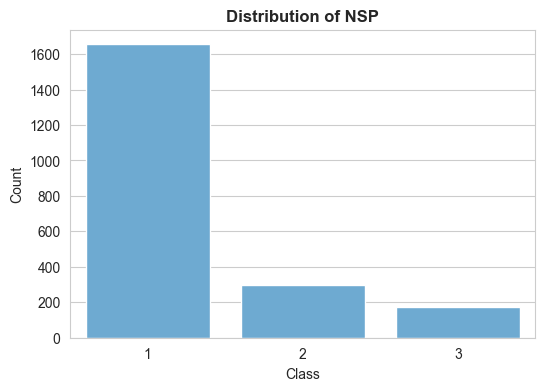

In [5]:
sns.set_style("whitegrid")
color = "#5DADE2"
plt.figure(figsize=(6, 4))

ax = sns.countplot(data=df, x="NSP", color=color)

plt.title("Distribution of NSP", fontweight='bold')
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [6]:
df.NSP.value_counts(normalize=True)*100

NSP
1    77.845720
2    13.875823
3     8.278457
Name: proportion, dtype: float64

One thing to note is that the NSP class is imbalanced. Classes 2 and 3 have much fewer counts compared to Class 1. We may want to consider using stratified splitting to create the dev and test sets.

In addition to the NSP class, we also have CLASS class, which we will not use for our project. 

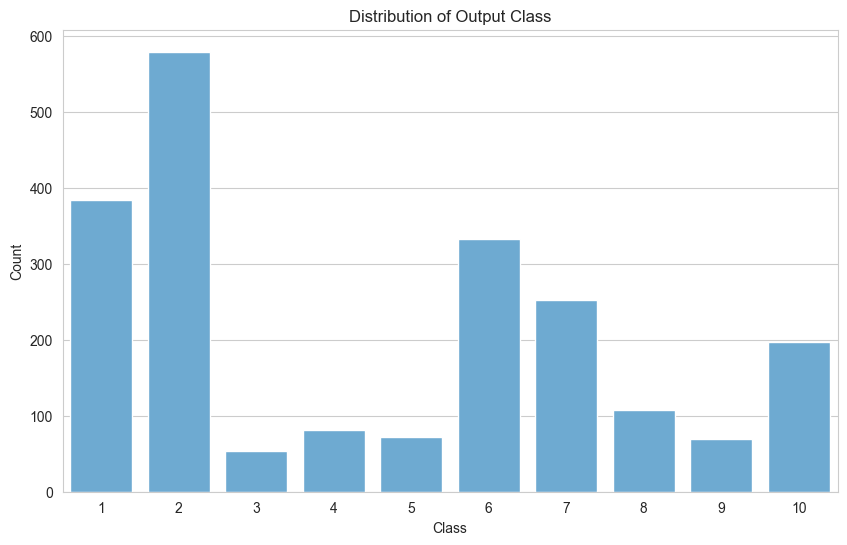

In [7]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df, x="CLASS", color=color)

plt.title("Distribution of Output Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [8]:
df['CLASS'].value_counts(normalize=True)*100

CLASS
2     27.234243
1     18.062088
6     15.616181
7     11.853246
10     9.266228
8      5.032926
4      3.809972
5      3.386642
9      3.245532
3      2.492944
Name: proportion, dtype: float64

This CLASS class is also imbalanced. 

In [9]:
df.info()
# There are no null values in this dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

In [10]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,4.509878,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,3.026883,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,2.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,4.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,7.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,10.000000,3.000000


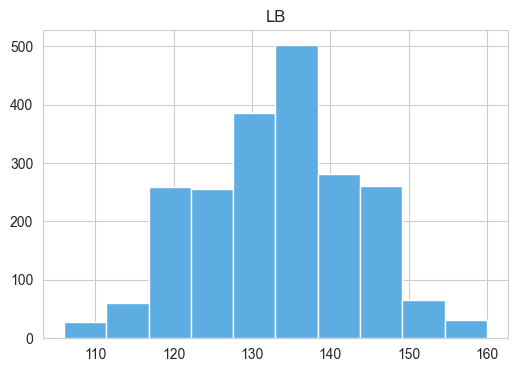

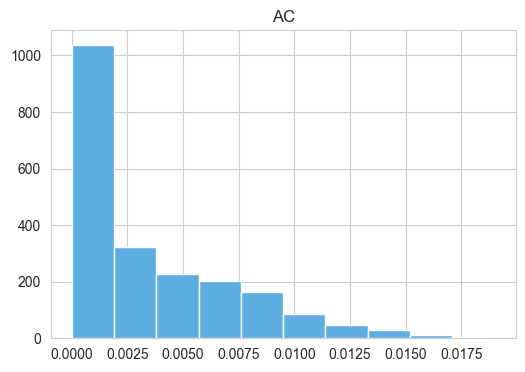

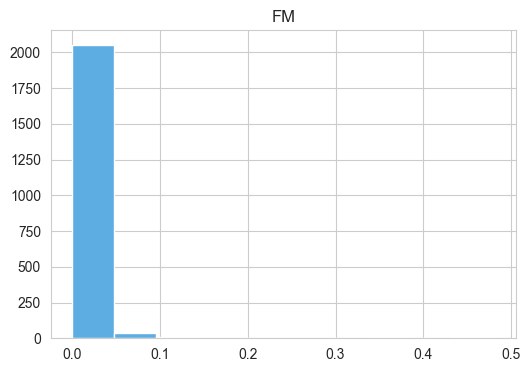

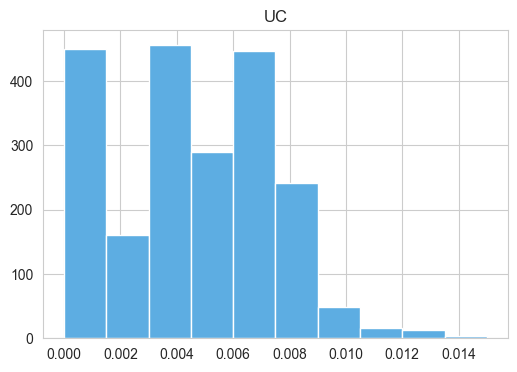

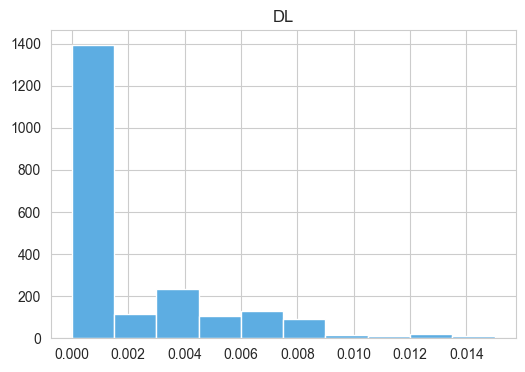

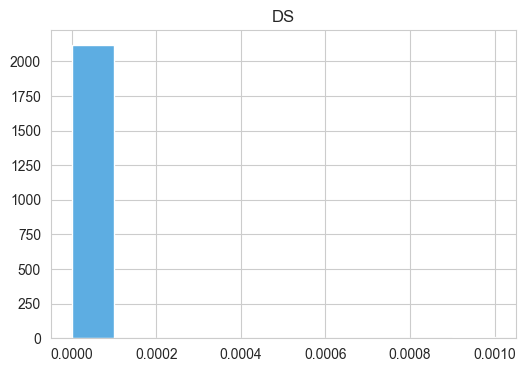

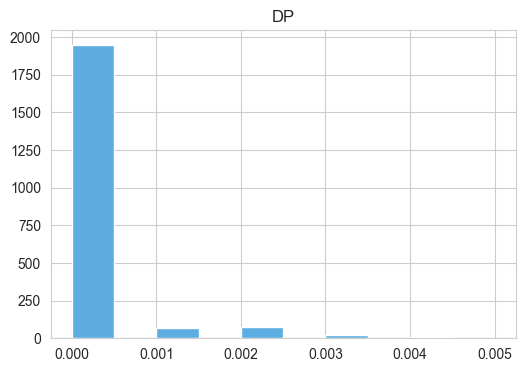

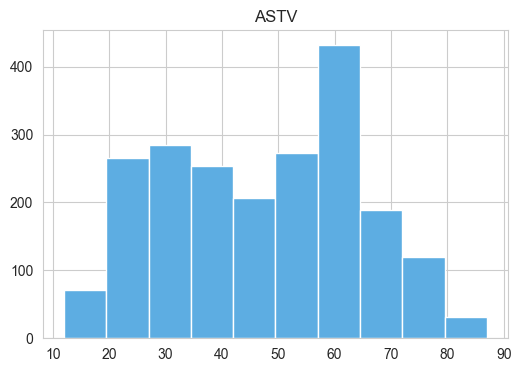

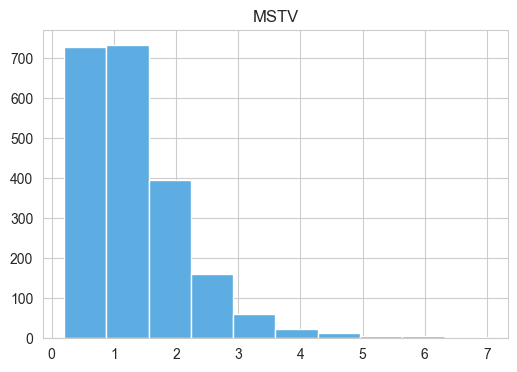

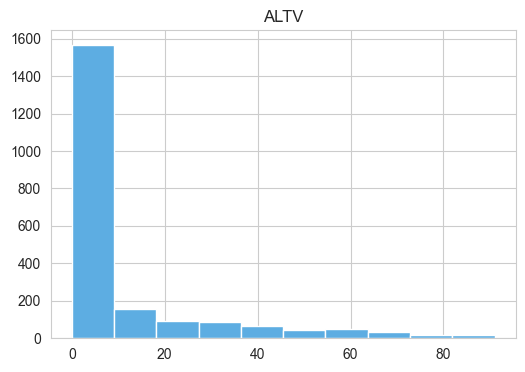

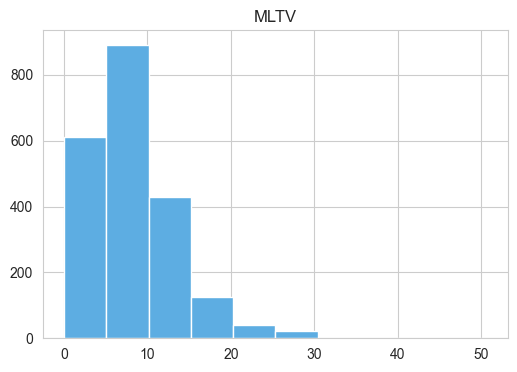

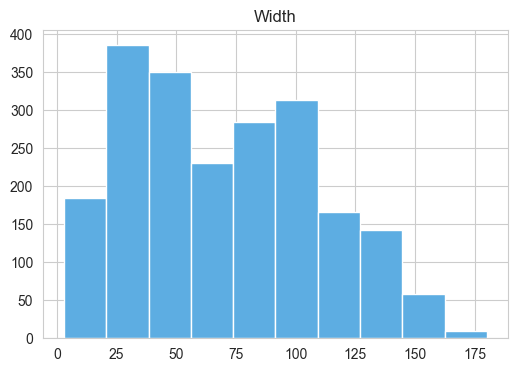

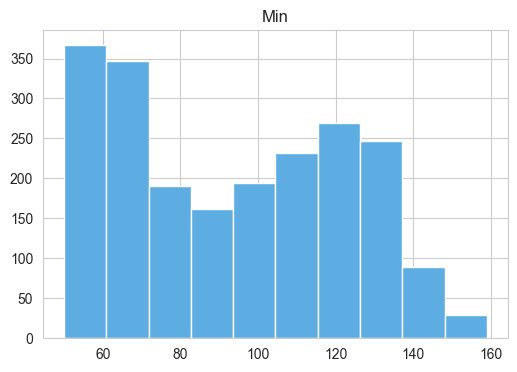

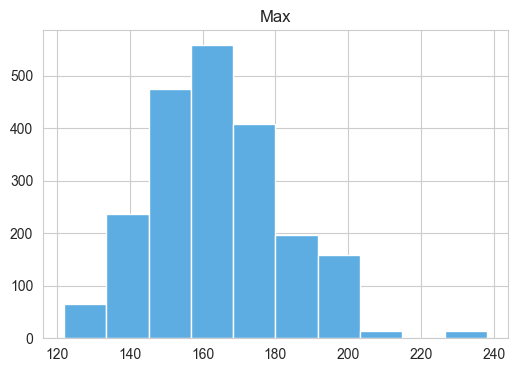

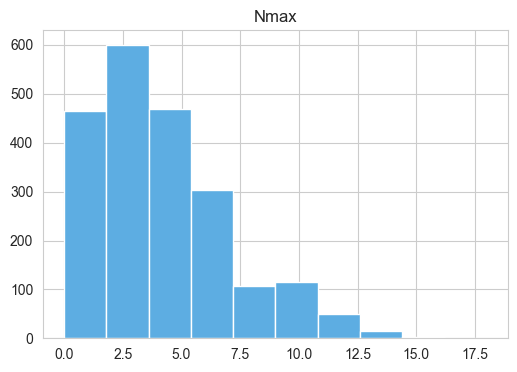

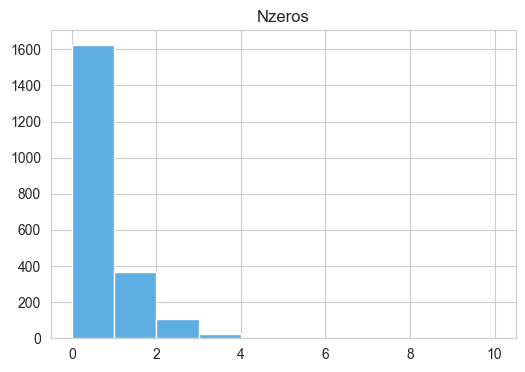

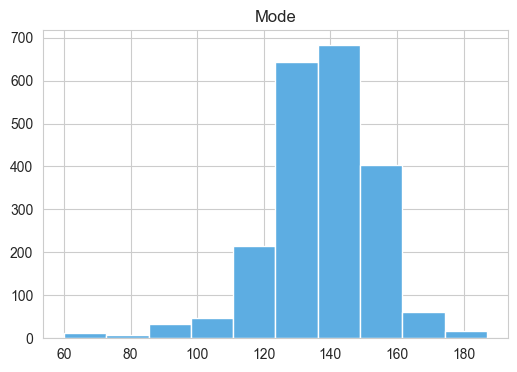

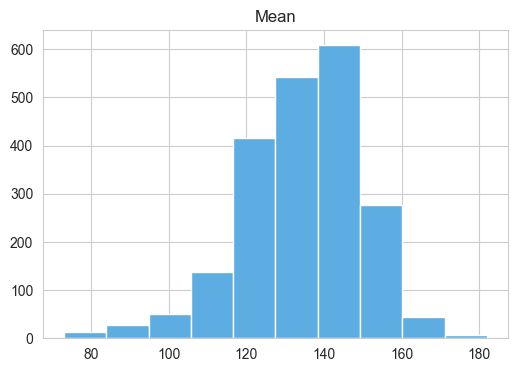

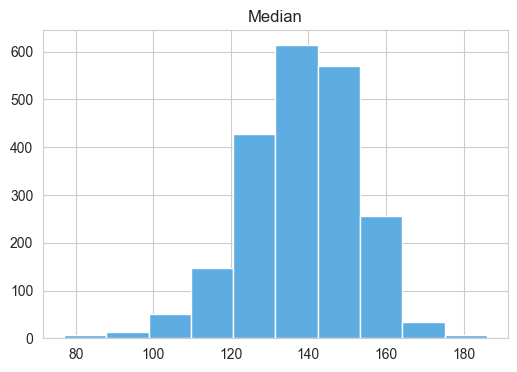

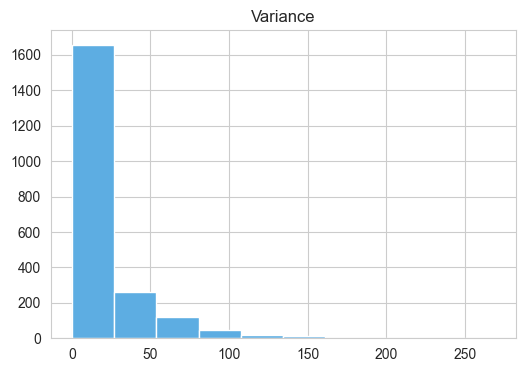

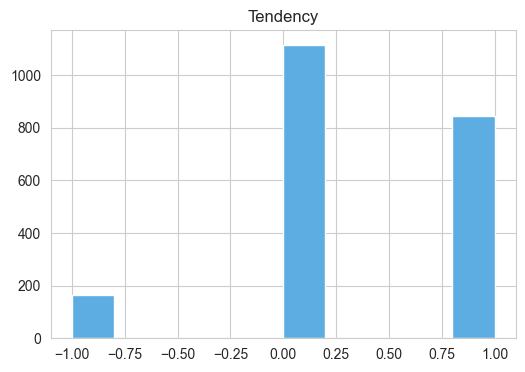

In [11]:
# We will quickly look through the distribution of each feature variable

for var in df.columns[:-2]:
    plt.figure(figsize=(6, 4))
    df[var].hist(color=color)
    plt.title(var)
    plt.show()

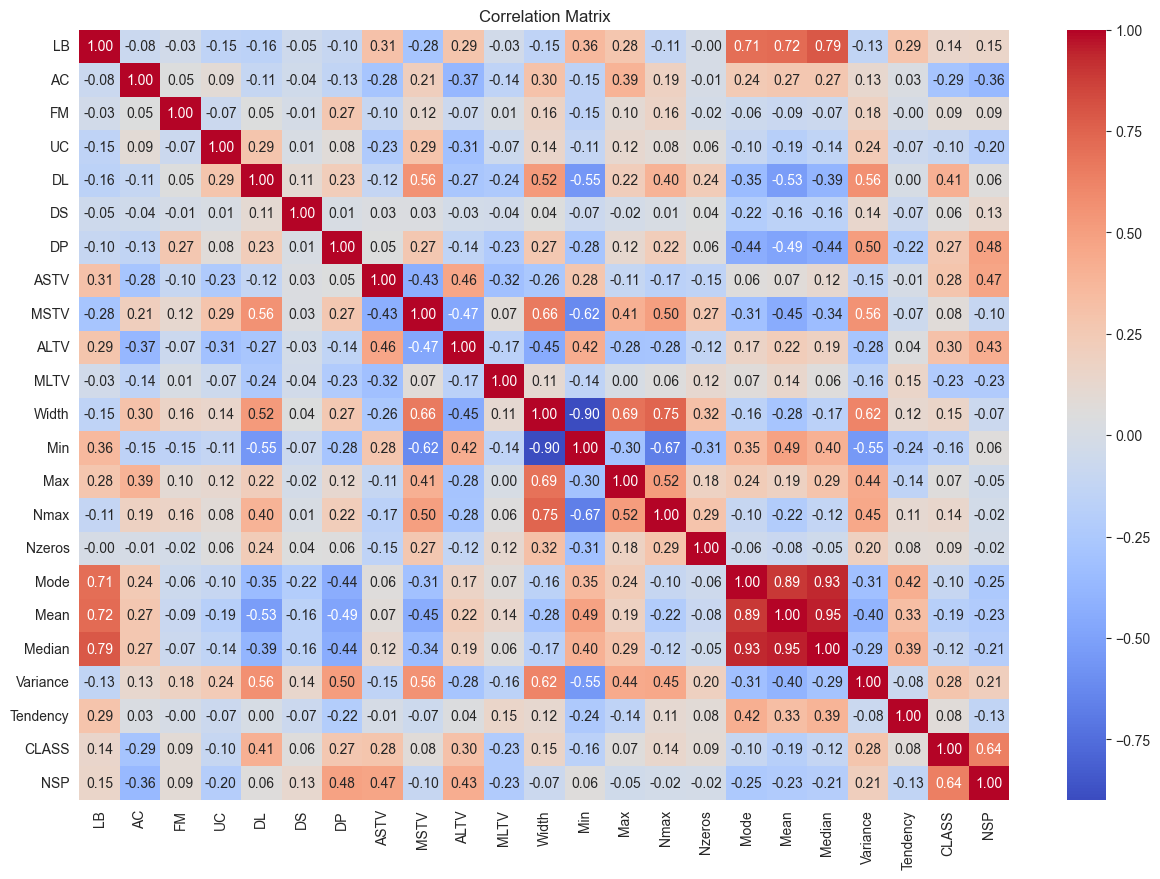

In [12]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We will drop columns with a correlation coefficient >= 0.8 to reduce multicollinearity. From the heatmap, we can see that Mean is highly correlated with both Mode (corr=0.89) and Median (corr=0.95). We will retain only one of these columns and choose to keep the Mean column.

## 2. Data Cleaning and Sampling

In [13]:
# Dropping because of high correlation coefficient
df = df.drop(columns=['Mode', 'Median'])

# Since we won't be focusing on the CLASS column
df = df.drop(columns='CLASS')
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mean,Variance,Tendency,NSP
0,120,0.000,0.000,0.000,0.000,0.0,0.0,73,0.5,43,2.4,64,62,126,2,0,137,73,1,2
1,132,0.006,0.000,0.006,0.003,0.0,0.0,17,2.1,0,10.4,130,68,198,6,1,136,12,0,1
2,133,0.003,0.000,0.008,0.003,0.0,0.0,16,2.1,0,13.4,130,68,198,5,1,135,13,0,1
3,134,0.003,0.000,0.008,0.003,0.0,0.0,16,2.4,0,23.0,117,53,170,11,0,134,13,1,1
4,132,0.007,0.000,0.008,0.000,0.0,0.0,16,2.4,0,19.9,117,53,170,9,0,136,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0.000,0.000,0.007,0.000,0.0,0.0,79,0.2,25,7.2,40,137,177,4,0,150,2,0,2
2122,140,0.001,0.000,0.007,0.000,0.0,0.0,78,0.4,22,7.1,66,103,169,6,0,148,3,1,2
2123,140,0.001,0.000,0.007,0.000,0.0,0.0,79,0.4,20,6.1,67,103,170,5,0,148,4,1,2
2124,140,0.001,0.000,0.006,0.000,0.0,0.0,78,0.4,27,7.0,66,103,169,6,0,147,4,1,2


In [14]:
# From the previous distribution of each feature variables, we observe that both the FM and the DS columns
# are highly unbalanced.

# However, after looking at the distribution more carefully, we decided only to drop the DS column because 
# the DS column have 99.6% of its data being recorded as 0.000 and only 0.3% of data have DS recorded as 0.001. 
# This column adds very little information. The FM column has many different values, so we decided to keep it.
df.FM.value_counts(normalize=True)

FM
0.000    0.616651
0.001    0.077140
0.002    0.052681
0.003    0.041392
0.004    0.023048
           ...   
0.079    0.000470
0.109    0.000470
0.103    0.000470
0.031    0.000470
0.099    0.000470
Name: proportion, Length: 102, dtype: float64

In [15]:
df.DS.value_counts(normalize=True)

DS
0.000    0.996707
0.001    0.003293
Name: proportion, dtype: float64

In [16]:
df = df.drop(columns='DS')

In [17]:
# We also observe that the Tendency column only contains 3 values: 0, 1, -1
# This means that the tendency column is a categorical variable, so when scaling, we will not standardize this 
# column. We will use one hot encoding on this column.
df.Tendency.value_counts(normalize=True)

Tendency
 0    0.524459
 1    0.397930
-1    0.077611
Name: proportion, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
X = df[df.columns.drop('NSP')]
y = df.NSP
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size = 0.7, stratify = y) # stratified on y
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, train_size = 0.5, stratify = y_temp)
print('X_train, y_train shape:', X_train.shape, y_train.shape)
print('X_valid, y_valid shape:', X_valid.shape, y_valid.shape)
print('X_test, y_test shape:', X_test.shape, y_test.shape)

X_train, y_train shape: (1488, 18) (1488,)
X_valid, y_valid shape: (319, 18) (319,)
X_test, y_test shape: (319, 18) (319,)


In [19]:
### We will consider and compare other sampling techniques such as random oversampling, random undersampling, etc

# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [20]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_features = X_train.columns.drop('Tendency')
ohe_features = ['Tendency']

processor = make_column_transformer((StandardScaler(), num_features),
                                    (OneHotEncoder(drop="first", handle_unknown="ignore"), ohe_features),
                                    remainder="passthrough")

X_train = processor.fit_transform(X_train)
X_valid = processor.transform(X_valid)
X_test = processor.transform(X_test)

# These are the data we will use to train out model!

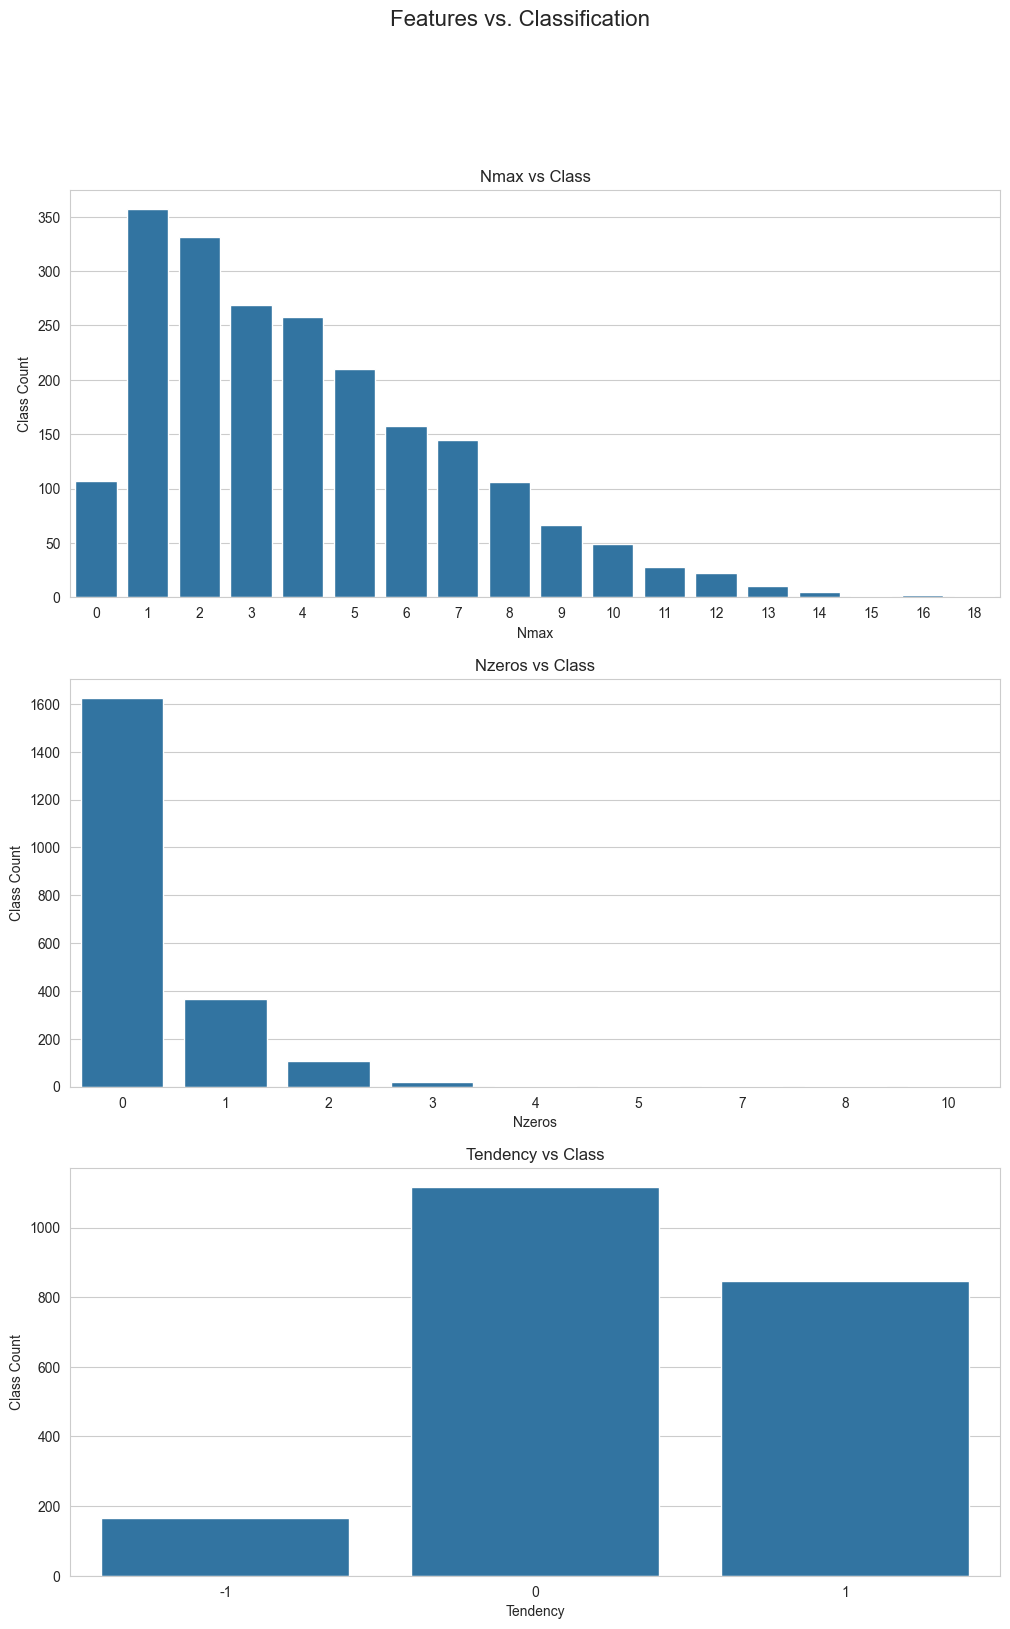

In [21]:
# Maybe we don't need this???

fig, axes = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle('Features vs. Classification', fontsize=16)

features = ['Nmax', 'Nzeros', 'Tendency']
barplots = ['Nmax', 'Nzeros', 'Tendency']

for ax, feature in zip(axes.flatten(), features):
    if feature in barplots:
        sns.countplot(data=df, x=feature, ax=ax)
    else:
        sns.stripplot(data=df, y=feature, x="CLASS", ax=ax)
    
    ax.set_title(feature + ' vs Class')
    ax.set_xlabel(feature)
    ax.set_ylabel('Class Count')

plt.show()

## 2. Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification

In [23]:
# tree = DecisionTreeClassifier()
# tree.fit(X_train, y_train)

# y_train_pred = tree.predict(X_train)
# y_valid_pred = tree.predict(X_valid)

# train_accuracy = accuracy_score(y_train, y_train_pred)
# train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# val_accuracy = accuracy_score(y_valid, y_valid_pred)
# val_f1 = f1_score(y_valid, y_valid_pred, average='weighted')

# print(f"Train Accuracy: {train_accuracy}")
# print(f"Train F1: {train_f1}")
# print(f"Val Accuracy: {val_accuracy}")
# print(f"Val F1: {val_f1}")

In [24]:
# tree = RandomForestClassifier()
# tree.fit(X_train, y_train)

# y_train_pred = tree.predict(X_train)
# y_valid_pred = tree.predict(X_valid)

# train_accuracy = accuracy_score(y_train, y_train_pred)
# train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# val_accuracy = accuracy_score(y_valid, y_valid_pred)
# val_f1 = f1_score(y_valid, y_valid_pred, average='weighted')

# print(f"Train Accuracy: {train_accuracy}")
# print(f"Train F1: {train_f1}")
# print(f"Val Accuracy: {val_accuracy}")
# print(f"Val F1: {val_f1}")

In [25]:
# # Testing different possible hyperparameters

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# model = RandomForestClassifier()

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# y_val_pred = best_model.predict(X_valid)
# val_accuracy = accuracy_score(y_valid, y_val_pred)

# print("Best Hyperparameters:", best_params)
# print("Validation Accuracy of Best Model:", val_accuracy)

# results = grid_search.cv_results_
# for mean_score, params in zip(results['mean_test_score'], results['params']):
#     print(f"Mean CV Accuracy: {mean_score:.4f} | Parameters: {params}")

In [26]:
# # Train best tree and see test performance
# tree = RandomForestClassifier(max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'], n_estimators=best_params['n_estimators'])

# tree.fit(X_train, y_train)

# y_train_pred = tree.predict(X_train)
# y_valid_pred = tree.predict(X_valid)
# y_test_pred = tree.predict(X_test)

# train_accuracy = accuracy_score(y_train, y_train_pred)
# train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# val_accuracy = accuracy_score(y_valid, y_valid_pred)
# val_f1 = f1_score(y_valid, y_valid_pred, average='weighted')

# test_accuracy = accuracy_score(y_test, y_test_pred)
# test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# print(f"Train Accuracy: {train_accuracy}")
# print(f"Train F1: {train_f1}")
# print(f"Val Accuracy: {val_accuracy}")
# print(f"Val F1: {val_f1}")
# print(f"Test Accuracy: {test_accuracy}")
# print(f"Test F1: {test_f1}")

## 2. Neural Network

In [27]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score

In [28]:
y_train_nn = to_categorical(y_train - 1)  
y_valid_nn = to_categorical(y_valid - 1)
y_test_nn = to_categorical(y_test - 1)

In [29]:
model = Sequential()

model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))  
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=3, activation='softmax'))  

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


C:\Users\yueer\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
history = model.fit(X_train, y_train_nn,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_valid, y_valid_nn),
                    verbose=1)


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5376 - loss: 0.9990 - val_accuracy: 0.8088 - val_loss: 0.4825
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8347 - loss: 0.4267 - val_accuracy: 0.8746 - val_loss: 0.3644
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8796 - loss: 0.3240 - val_accuracy: 0.8746 - val_loss: 0.3219
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8923 - loss: 0.2946 - val_accuracy: 0.8809 - val_loss: 0.3014
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8893 - loss: 0.2672 - val_accuracy: 0.8840 - val_loss: 0.2799
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8775 - loss: 0.2745 - val_accuracy: 0.8934 - val_loss: 0.2687
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9088 - loss: 0.2413 - val_accuracy: 0.9060 - val_loss: 0.2593
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9111 - loss: 0.2172 - val_accuracy: 0.9091 - val_loss

In [31]:
y_test_pred_proba = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_proba, axis=1) + 1  

y_test_classes = np.argmax(y_test_nn, axis=1) + 1

test_accuracy = accuracy_score(y_test_classes, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

print(classification_report(y_test_classes, y_test_pred))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Test Accuracy: 0.8966
              precision    recall  f1-score   support

           1       0.95      0.95      0.95       248
           2       0.68      0.61      0.64        44
           3       0.77      0.85      0.81        27

    accuracy                           0.90       319
   macro avg       0.80      0.81      0.80       319
weighted avg       0.89      0.90      0.90       319



## 3. Neural Network with SMOTE

In [33]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# One-hot encode the resampled target labels
y_train_nn_smote = to_categorical(y_train_smote - 1)
y_valid_nn_smote = to_categorical(y_valid - 1)
y_test_nn_smote = to_categorical(y_test - 1)

# Define the neural network model
model_smote = Sequential()

model_smote.add(Dense(units=128, activation='relu', input_shape=(X_train_smote.shape[1],)))
model_smote.add(Dropout(0.3))  
model_smote.add(Dense(units=64, activation='relu'))
model_smote.add(Dropout(0.3))

model_smote.add(Dense(units=3, activation='softmax'))  

# Compile the model
model_smote.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Train the model using the resampled data
history_smote = model_smote.fit(X_train_smote, y_train_nn_smote,
                                epochs=20,
                                batch_size=32,
                                validation_data=(X_valid, y_valid_nn_smote),
                                verbose=1)

# Predict and evaluate the model on the test set
y_test_pred_proba_smote = model_smote.predict(X_test)
y_test_pred_smote = np.argmax(y_test_pred_proba_smote, axis=1) + 1  

y_test_classes_smote = np.argmax(y_test_nn_smote, axis=1) + 1

test_accuracy_smote = accuracy_score(y_test_classes_smote, y_test_pred_smote)
print(f"Test Accuracy with SMOTE: {test_accuracy_smote:.4f}")

print(classification_report(y_test_classes_smote, y_test_pred_smote))


C:\Users\yueer\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6433 - loss: 0.8192 - val_accuracy: 0.8495 - val_loss: 0.3714
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8273 - loss: 0.4091 - val_accuracy: 0.8527 - val_loss: 0.3327
Epoch 3/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8559 - loss: 0.3419 - val_accuracy: 0.8621 - val_loss: 0.3052
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9029 - loss: 0.2783 - val_accuracy: 0.8777 - val_loss: 0.3014
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9010 - loss: 0.2559 - val_accuracy: 0.8746 - val_loss: 0.3118
Epoch 6/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9088 - loss: 0.2353 - val_accuracy: 0.8746 - val_loss: 0.2895
Epoch 7/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9194 - loss: 0.2142 - val_accuracy: 0.8840 - val_loss: 0.2874
Epoch 8/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9289 - loss: 0.1896 - val_accuracy: 0.